In [1]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --upgrade jupyter ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# Student Name: Affoue Yvonne Tano Konan
# Student ID: 010345654
# Course Name: Computer Science Capstone - C964

# Predictive Model for Laptop Pricing


## Library Imports and Data Loading

Python libraries that will support data processing, visualization, and machine learning:

* Matplotlib: A core visualization library for creating various types of plots, such as bar charts, box plots, and heatmaps.

* NumPy: Used for efficient numerical operations, especially with arrays and matrices, often in conjunction with Pandas.
* Seaborn: Built on top of Matplotlib, Seaborn makes it easier to create visually appealing statistical graphics.

* Pandas: Allows for easy manipulation of tabular data using DataFrames and is essential for reading and analyzing CSV files.

* SciPy: Provides scientific tools, including support for machine learning tasks like Linear Regression, which we’ll use in this model.

* IPyWidgets: Adds interactivity to Jupyter Notebooks through widgets like sliders, dropdowns, and buttons.


In [8]:
import numpy as num
import pandas as pda
import matplotlib.pyplot as p
import seaborn as sbn
import ipywidgets as wgt
from scipy import stats
from IPython.display import display
%matplotlib inline

In [9]:
# The dataset is loaded from a CSV file using Pandas. It has not yet undergone any cleaning or preprocessing

In [10]:
path = "laptop_price.csv"  # Define the file path to the laptop price dataset (update if needed)

CSV = pda.read_csv(path, encoding='latin-1')  # Load the CSV file into a pandas DataFrame, using 'latin-2' encoding

sbn.set_palette("coolwarm")  # Set a new Seaborn color palette to 'coolwarm' (a nice blend of blues and reds)

sbn.set_style("darkgrid")  # Change the Seaborn plot background to 'darkgrid' for a sleek dark theme with gridlines

## Preliminary Data Analysis

In [11]:
# We explore important aspects of the dataset to uncover valuable insights that will inform our analysis.

In [12]:
# Display the entire loaded dataset stored in the variable 'CSV'
# This helpscheck if the data was read correctly from the CSV file
CSV

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_dollars
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [13]:
# The dataset loaded from the CSV file contains 1,303 rows and 13 columns.
# To assess the structure of the DataFrame, we utilize .info() to identify missing values and observe the data types assigned to each column.

In [14]:
# Display a concise summary of the DataFrame 'CSV'
# Shows:
# - Total number of entries (rows)
# - Number of columns
# - Column names and their data types
# - Number of non-null (non-missing) entries in each column
# - Memory usage of the DataFrame
CSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_dollars     1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [15]:
# Using .describe(), we obtain key descriptive statistics for numerical features, while object-type columns are excluded.

In [16]:
# Generate descriptive statistics of the DataFrame 'CSV'
# Shows:
# - Count: Number of non-null values for each numeric column
# - Mean: Average value
# - Std: Standard deviation (how spread out the values are)
# - Min: Minimum value
# - 25%: 1st quartile (25% of data falls below this value)
# - 50%: Median (50% of data falls below this value)
# - 75%: 3rd quartile (75% of data falls below this value)
# - Max: Maximum value
CSV.describe()

,laptop_ID,Inches,Price_dollars
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [17]:
# To understand the range of each feature, we examine the minimum and maximum values across all columns.

In [18]:
# Print the maximum value for each column in the DataFrame 'CSV'
# For numerical columns, it shows the highest number
# For categorical columns (text), it shows the last item alphabetically
print("The Max Values:\n\n\n", CSV.max())

The Max Values:


 laptop_ID                                    1320
Company                                    Xiaomi
Product                    Zenbook UX510UW-FI095T
TypeName                              Workstation
Inches                                       18.4
ScreenResolution            Touchscreen 2560x1440
Cpu                 Samsung Cortex A72&A53 2.0GHz
Ram                                           8GB
Memory                                    8GB SSD
Gpu                           Nvidia Quadro M620M
OpSys                                       macOS
Weight                                        4kg
Price_dollars                              6099.0
dtype: object


In [19]:
# Print the minimum value for each column in the DataFrame 'CSV'
# For numerical columns, it shows the lowest number
# For categorical columns (text), it shows the first item alphabetically
print("The Min Values:\n\n\n", CSV.min())

The Min Values:


 laptop_ID                                           1
Company                                          Acer
Product             110-15ACL (A6-7310/4GB/500GB/W10)
TypeName                           2 in 1 Convertible
Inches                                           10.1
ScreenResolution                             1366x768
Cpu                       AMD A10-Series 9600P 2.4GHz
Ram                                              12GB
Memory                                      1.0TB HDD
Gpu                                AMD FirePro W4190M
OpSys                                         Android
Weight                                         0.69kg
Price_dollars                                   174.0
dtype: object


In [20]:
# As the data is in its raw form and some columns are of type 'object' rather than numerical,
# the maximum and minimum values may not be accurate for all columns.We will clean the data.

## Cleaning and Structuring the Data

In [21]:
# Having gained an initial understanding of the data,
# we now proceed with cleaning the data to improve its readability for both the user and the machine learning model.
# The first step is to remove any duplicate rows.

In [22]:
# Remove duplicate rows from the DataFrame 'CSV' 
# 'inplace=True' modifies the original DataFrame directly without creating a new one
CSV.drop_duplicates(inplace=True)

In [23]:
# Display the content of the DataFrame 'CSV'
# This will show all the rows and columns in the DataFrame, providing a snapshot of the data
CSV

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_dollars
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [24]:
# The unchanged row count confirms no duplicate entries were found.
# Next, we eliminate the 'ID' and 'product' columns, as they don't impact our laptop price prediction model. 
# For ease of interpretation, we also reorder the 'price' column to appear first in the DataFrame.

In [25]:
# Drop the 'laptop_ID' column from the DataFrame 'CSV' along the axis=1 (columns)
# 'inplace=True' modifies the original DataFrame without returning a new one
CSV.drop("laptop_ID", axis=1, inplace=True)

# Drop the 'Product' column from the DataFrame 'CSV' along the axis=1 (columns)
# 'inplace=True' modifies the original DataFrame without returning a new one
CSV.drop("Product", axis=1, inplace=True)

# Remove the 'Price_dollars' column from 'CSV' and store it in a variable called 'first_column'
# This removes the column while keeping the data for future use
first_column = CSV.pop("Price_dollars")

# Insert the 'Price_dollars' column back into the DataFrame at the first position (index 0)
# This places 'Price_dollars' as the first column in the DataFrame
CSV.insert(0, "Price_dollars", first_column)

In [26]:
CSV

,Price_dollars,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1339.69,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,898.94,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,575.00,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,2537.45,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,1803.60,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg
...,...,...,...,...,...,...,...,...,...,...,...
1298,638.00,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg
1299,1499.00,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg
1300,229.00,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg
1301,764.00,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg


In [27]:
# Given that we are using a supervised regression algorithm, object-type columns need to be converted into numerical format.
# We will clean and convert these columns one by one. 
# Specifically, we will one-hot encode the 'Company', 'TypeName', and 'OpSys' columns, 
# creating separate binary columns for each unique value and removing the original columns from the dataset.

In [28]:
# Perform one-hot encoding on the 'Company' column:
# This creates new binary (0 or 1) columns for each unique company name
CSV = CSV.join(pda.get_dummies(CSV.Company))

# After one-hot encoding, drop the original 'Company' column since it's now represented by the new dummy columns
CSV = CSV.drop("Company", axis=1)

In [29]:
# Perform one-hot encoding on the 'TypeName' column:
# This will create new binary (0 or 1) columns for each unique type of device
CSV = CSV.join(pda.get_dummies(CSV.TypeName))

# After encoding, drop the original 'TypeName' column as it is now represented by the newly created dummy columns
CSV = CSV.drop("TypeName", axis=1)

In [30]:
# Perform one-hot encoding on the 'OpSys' (Operating System) column:
# This will create new binary (0 or 1) columns for each unique OS
CSV = CSV.join(pda.get_dummies(CSV.OpSys))

# After encoding, drop the original 'OpSys' column as it is now represented by the newly created dummy columns
CSV = CSV.drop("OpSys", axis=1)

In [31]:
# The transformations applied here extract relevant features from different columns and perform one-hot encoding as needed.
# This ensures that categorical variables are transformed into numerical values suitable for machine learning, 
# while preserving their essential characteristics.

In [32]:
# --- Process the 'ScreenResolution' column ---

# Extract the resolution part only from the 'ScreenResolution' field
CSV["ScreenResolution"] = CSV.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

# From the extracted resolution, get the Screen Width (the first part before 'x')
CSV["Screen Width"] = CSV.ScreenResolution.str.split("x").apply(lambda x: x[0])

# From the extracted resolution, get the Screen Height (the second part after 'x')
CSV["Screen Height"] = CSV.ScreenResolution.str.split("x").apply(lambda x: x[1])

# Drop the original 'ScreenResolution' column since its data has been separated into Width and Height
CSV = CSV.drop("ScreenResolution", axis=1)

# Convert the 'Screen Width' column from string to integer for numerical analysis
CSV["Screen Width"] = CSV["Screen Width"].astype("int")

# Convert the 'Screen Height' column from string to integer for numerical analysis
CSV["Screen Height"] = CSV["Screen Height"].astype("int")

In [33]:
# --- Process the 'Cpu' column ---

# Extract the CPU brand by taking the first word from the 'Cpu' column
CSV["CPU Brand"] = CSV.Cpu.str.split(" ").apply(lambda x: x[0])

# Extract the CPU frequency (e.g., "2.3GHz") by taking the last element from the 'Cpu' column
CSV["CPU Frequency"] = CSV.Cpu.str.split(" ").apply(lambda x: x[-1])

# Drop the original 'Cpu' column since we have extracted the needed information
CSV = CSV.drop("Cpu", axis=1)

# Remove the "GHz" text from the CPU frequency values
CSV["CPU Frequency"] = CSV["CPU Frequency"].str[:-3]

# Convert the CPU frequency values from string to float
CSV["CPU Frequency"] = CSV["CPU Frequency"].astype("float")

# One-hot encode the extracted CPU brands
cpu_categories = pda.get_dummies(CSV["CPU Brand"])

# Rename the one-hot encoded CPU columns to make it clear they represent CPU brands
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

# Merge the one-hot encoded CPU brand columns into the main DataFrame
CSV = CSV.join(cpu_categories)

# Drop the temporary 'CPU Brand' column after encoding
CSV = CSV.drop("CPU Brand", axis=1)

In [34]:
# --- Process the 'Memory' column ---

# Extract the memory amount value
CSV["Memory Amount"] = CSV.Memory.str.split(" ").apply(lambda x: x[0])

# Extract the memory type
CSV["Memory Type"] = CSV.Memory.str.split(" ").apply(lambda x: x[1])

# Define a function to convert memory sizes to megabytes (MB)
def convert_memory_to_megabytes(value):
    if "GB" in value:
        # If the value is in GB, multiply by 1000 to get MB
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        # If the value is in TB, multiply by 1,000,000 to get MB
        return float(value[:value.find("TB")]) * 1000000

# Apply the conversion function to the 'Memory Amount' column
CSV["Memory Amount"] = CSV["Memory Amount"].apply(convert_memory_to_megabytes)

# Drop the original 'Memory' column since its information has been separated
CSV = CSV.drop("Memory", axis=1)

# Drop the 'Memory Type' column since it's not needed for prediction
CSV = CSV.drop("Memory Type", axis=1)


In [35]:
# --- Process the 'Gpu' column ---

# Extract the GPU brand by taking the first word from the 'Gpu' column
CSV["GPU Brand"] = CSV.Gpu.str.split(" ").apply(lambda x: x[0])

# Drop the original 'Gpu' column as it is no longer needed
CSV = CSV.drop("Gpu", axis=1)

# Create one-hot encoded variables for each GPU brand
gpu_categories = pda.get_dummies(CSV["GPU Brand"])

# Rename the one-hot encoded columns to indicate they represent GPU brands
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

# Add the one-hot encoded GPU brand columns back into the main DataFrame
CSV = CSV.join(gpu_categories)

# Drop the temporary 'GPU Brand' column as it has been encoded
CSV = CSV.drop("GPU Brand", axis=1)

In [36]:
# The 'Ram' and 'Weight' columns are cleaned by removing unit indicators ('GB' and 'kg') 
# and converting the values to appropriate numerical types—integers for RAM and floats for weight.

In [37]:
# --- Process the 'Ram' column ---

# Remove the last two characters from the 'Ram' string values
CSV["Ram"] = CSV["Ram"].str[:-2]

# Convert the cleaned 'Ram' values from string to integer for numerical operations
CSV["Ram"] = CSV["Ram"].astype("int")

In [38]:
# --- Process the 'Weight' column ---
# Remove the last two characters from the 'Weight' string values
CSV["Weight"] = CSV["Weight"].str[:-2]

# Convert the cleaned 'Weight' values from string to float for numerical analysis
CSV["Weight"] = CSV["Weight"].astype("float")

## Visual Data Analysis

In [39]:
# With the dataset preprocessed, we will initiate data visualization to analyze feature relationships—starting with the cleaned columns.

In [40]:
# Calculate the correlation of all features with 'Price_dollars'
# take the absolute value to ignore negative/positive direction
# and sort the correlations in ascending order.

In [41]:
trg_corr = CSV.corr()['Price_dollars'].apply(abs).sort_values()

In [42]:
trg_corr

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI                   0.180100
AMD_CPU 

In [43]:
# Create a list of feature names by extracting the index (column names)
# from the sorted correlation values, excluding the first entry.

In [44]:
chosen_ftr = list(trg_corr.index[1:])

In [45]:
# Visualisation of the statistical distribution of laptop prices.

In [46]:
# Create a distribution plot (histogram with a density curve) for the 'Price_dollars' column.
# The plot uses purple bars, dark blue, 40 bins, a KDE curve, and includes a legend for clarity.

In [47]:
sbn.displot(data = CSV, x = "Price_dollars", color='purple', bins=40, kde=True, linewidth = 2, edgecolor = "darkblue", alpha = 0.8, legend=True)

In [48]:
# The histogram indicates that the majority of laptops are priced between $500 and $1,500.

In [49]:
# We will evaluate how average laptop prices vary by manufacturer.

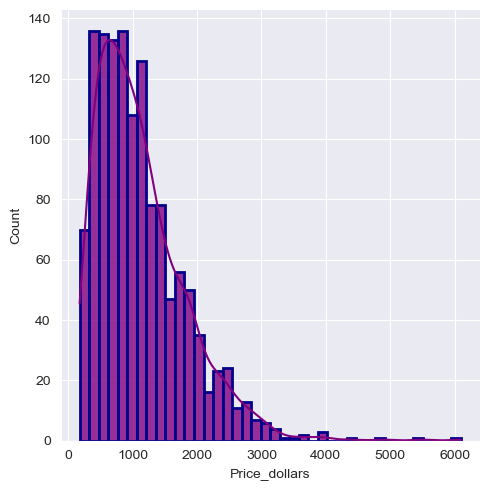

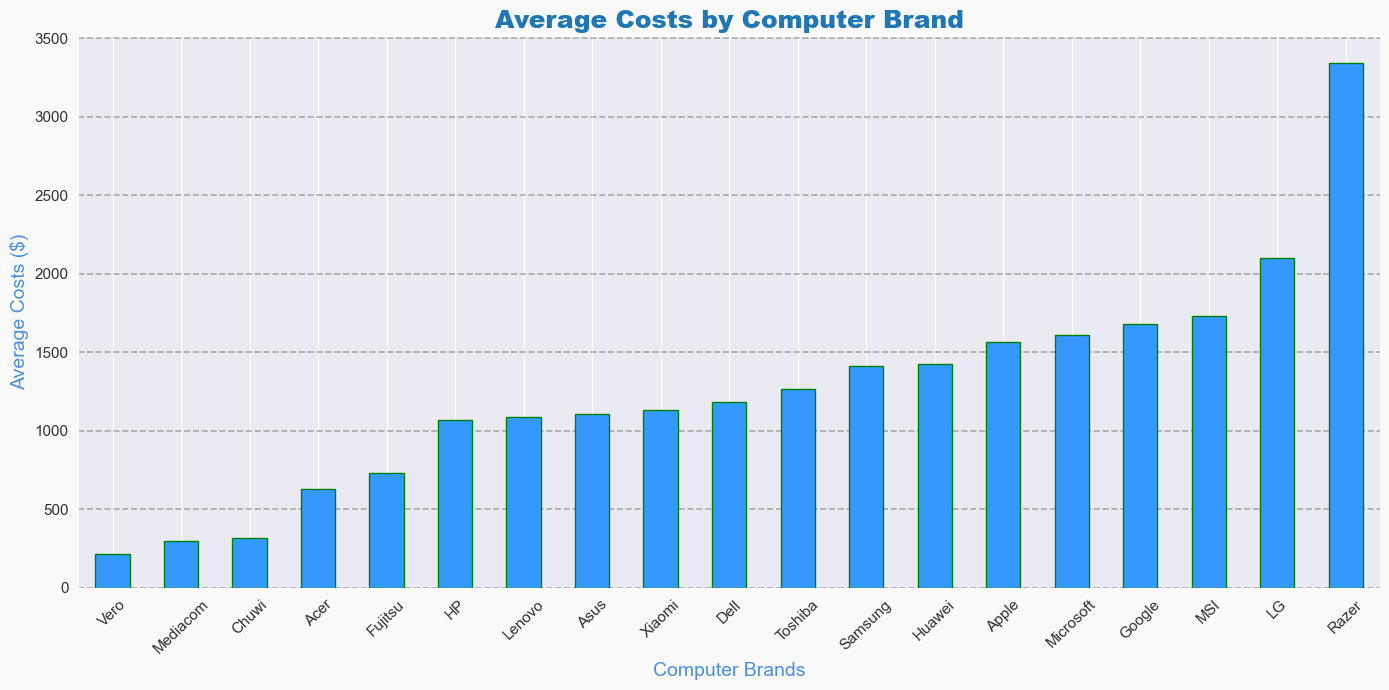

In [50]:
# Generate a list of computer brands extracted from the chosen features
brand_of_computer = [
    "Asus", "Xiaomi", "Fujitsu", "Huawei", "Lenovo",  # Popular and affordable brands
    "Microsoft", "HP", "Toshiba", "Google", "Samsung",  # Well-known tech giants
    "LG", "Vero", "Dell", "Apple", "Chuwi",  # Premium and trusted brands
    "Mediacom", "MSI", "Acer", "Razer",  # Gaming and performance-oriented brands
]

# Create a list of brands that are actually present in the CSV columns
computer_brands = [brand for brand in brand_of_computer if brand in CSV.columns]

# Calculate total cost per brand by multiplying each brand column by the laptop price and summing
total_cost_by_brand = CSV[computer_brands].mul(CSV['Price_dollars'], axis=0).sum()  # Multiply brand columns by price, then sum

# Calculate the total number of laptops per brand
total_laptops_per_brand = CSV[computer_brands].sum() # Sum up all laptops per brand

# Calculate the average cost per brand
average_costs = total_cost_by_brand / total_laptops_per_brand # Divide total cost by total units

# Sort the average costs in ascending order
average_costs = average_costs.sort_values()

# Set figure size
p.figure(figsize=(14, 7), facecolor='#f9f9f9', edgecolor='black', dpi=100)

# Plot the average costs as a bar chart with blue bars and green edges
average_costs.plot(kind='bar', color='#3399FF', edgecolor='green') # Blue bars with green edges

# Set the title of the plot
p.title('Average Costs by Computer Brand', fontsize=18, fontweight='heavy', color='#1f78b4') # Dark blue for the title

# Set the x-axis label
p.xlabel('Computer Brands', fontsize=14 , color='#4a90e2') # Soft blue for x-axis label

# Set the y-axis label
p.ylabel('Average Costs ($)', fontsize=14 , color='#4a90e2') # Soft blue for y-axis label

# Rotate x-axis labels for better readability and set font size
p.xticks(rotation=44, fontsize=11, color='#333333') # Dark gray for x-axis ticks

# Set the y-axis ticks font size
p.yticks(fontsize=11, color='#333333') # Dark gray for y-axis ticks

# Add horizontal grid lines on the y-axis
p.grid(axis='y', linestyle='--', linewidth=1.2, color='gray', alpha=0.6)

# Adjust layout to prevent label cutoff
p.tight_layout()

# Display the plot
p.show()

In [51]:
# According to the bar graph, Razer and LG laptops typically occupy the upper range of the pricing scale.

In [52]:
# analycis of the average laptop prices based on CPU brands.

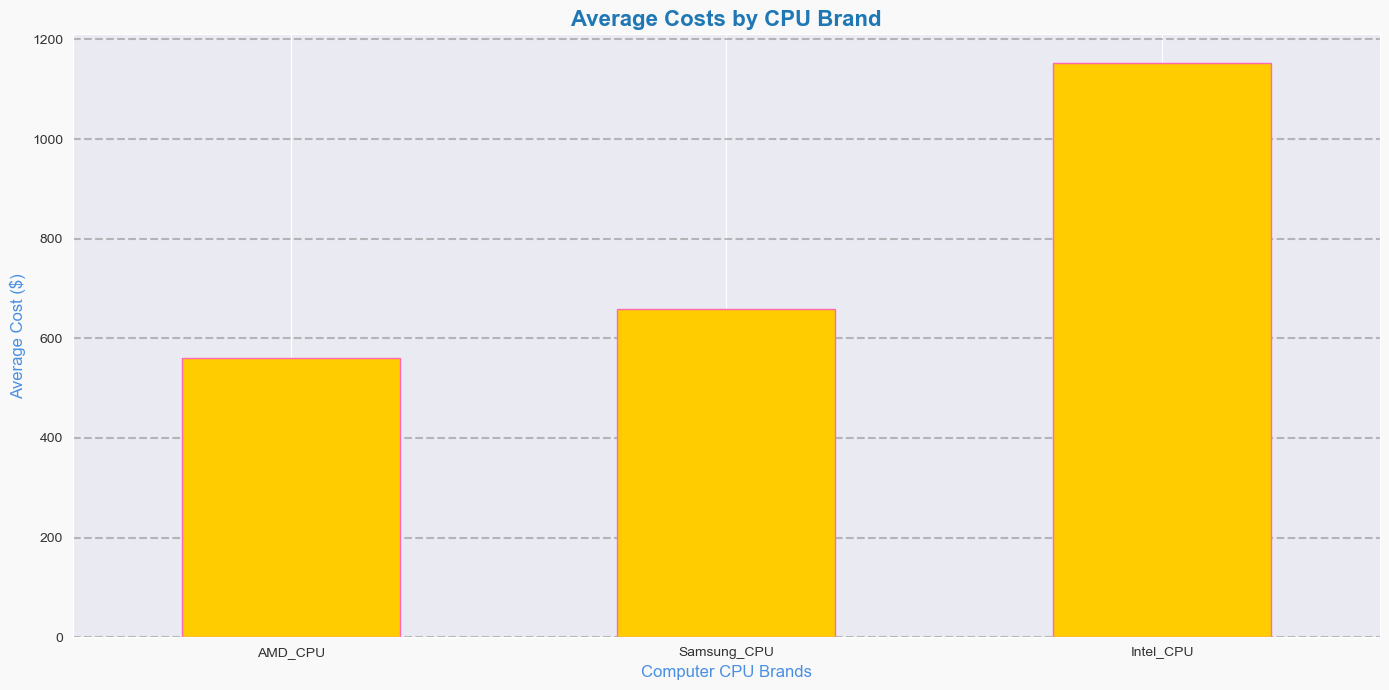

In [53]:
# Define the list of CPU brands available in the dataset
computer_cpu = ["Samsung_CPU", "AMD_CPU", "Intel_CPU"]

# Filter the list to include only those CPU brands that are present in the CSV columns
columns_for_cpu = [cpu for cpu in computer_cpu if cpu in CSV.columns]

# Calculate the total cost per CPU by multiplying each CPU column with the 'Price_dollars' column and summing the results
cost_per_cpu = CSV[columns_for_cpu].mul(CSV['Price_dollars'], axis=0).sum()

# Calculate the total number of laptops for each CPU by summing the rows of the relevant CPU columns
laptops_by_cpu = CSV[columns_for_cpu].sum()

# Calculate the average cost for each CPU by dividing the total cost by the number of laptops per CPU
average_costs_cpu = cost_per_cpu / laptops_by_cpu

# Sort the average costs in ascending order to display the CPU brands with the lowest average cost first
average_costs_cpu = average_costs_cpu.sort_values()

# Create a figure with a size of 12x6 inches for the plot
p.figure(figsize=(14, 7), facecolor='#f9f9f9', edgecolor='black', dpi=100)

# Plot the average cost per CPU as a bar chart with dark yellow bars and pink edges
average_costs_cpu.plot(kind='bar', color='#FFCC00', edgecolor='#FF69B4')

# Set the title of the plot with specific font size and weight
p.title('Average Costs by CPU Brand', fontsize=16, fontweight='bold', color='#1f78b4')  # Dark blue for the title

# Label the x-axis (CPU Brand) with specific font size
p.xlabel('Computer CPU Brands', fontsize=12, color='#4a90e2')  # Soft blue for x-axis label

# Label the y-axis (Average Price in Dollars) with specific font size
p.ylabel('Average Cost ($)', fontsize=12, color='#4a90e2')  # Soft blue for y-axis label

# Set the x-axis labels to have no rotation, with a smaller font size
p.xticks(rotation=0, fontsize=10, color='#333333')  # Dark gray for x-axis ticks

# Set the font size of the y-axis ticks for better readability
p.yticks(fontsize=10, color='#333333')  # Dark gray for y-axis ticks

# Add horizontal grid lines to make the chart easier to read
p.grid(axis='y', linestyle='--', linewidth=1.5, color='gray', alpha=0.5, which='both')

# Automatically adjust the layout to make sure everything fits within the figure
p.tight_layout()

# Display the plot
p.show()

In [54]:
# The bar graph highlights that Intel-powered laptops are generally priced higher.

In [55]:
# We will now examine how RAM size correlates with laptop price.

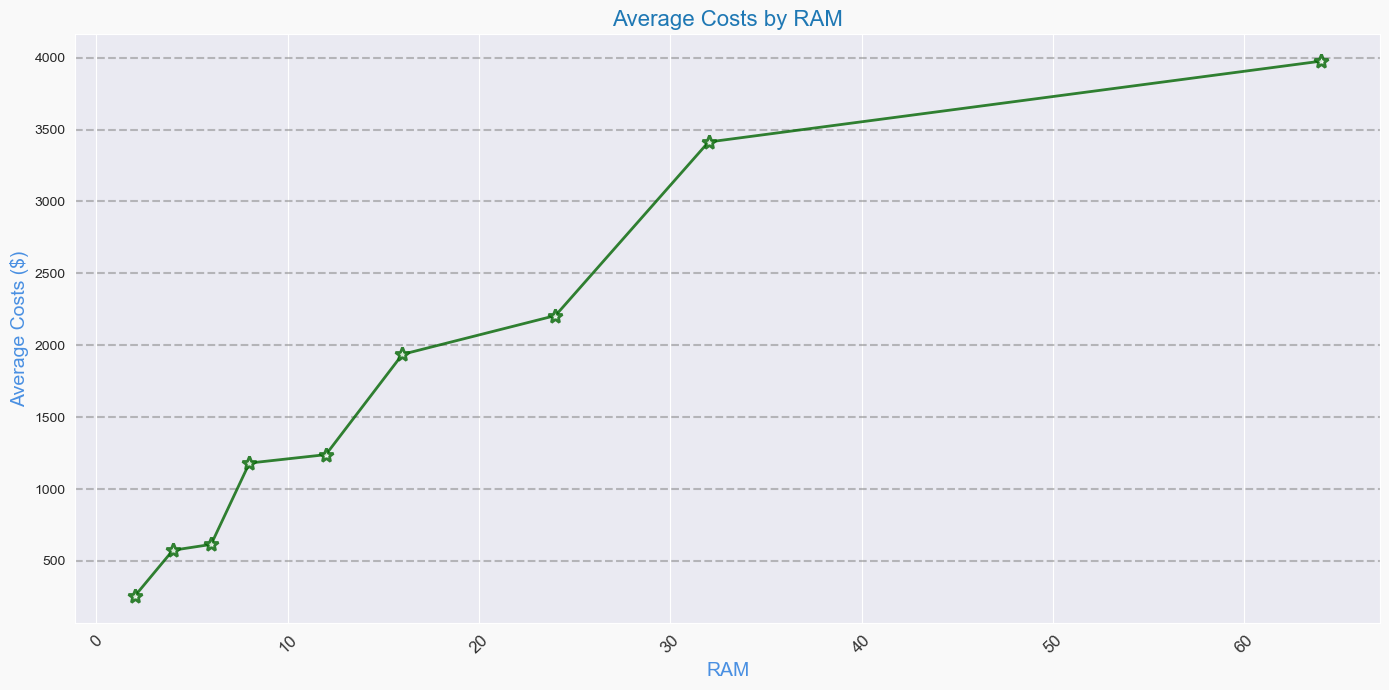

In [56]:
# Group the data by 'Ram' column, calculate the mean price for each RAM value, and sort the values in ascending order
average_costs = CSV.groupby('Ram')['Price_dollars'].mean().sort_values()

# Create a figure with a size of 12x6 inches for the plot

p.figure(figsize=(14, 7), facecolor='#f9f9f9', edgecolor='black', dpi=100)

# Plot the average costs as a line plot with markers ('o') at each data point, pink color, solid line, and thicker line width
average_costs.plot(kind='line', marker='*', color='#006400', linestyle='-', 
                   linewidth=2, markersize=10, markerfacecolor='#ffffff', markeredgewidth=2, alpha=0.8)

# Title of the plot with a font size of 16
p.title('Average Costs by RAM', fontsize=16, color='#1f78b4') # Dark blue for the title

# Label the x-axis as 'Ram' with font size 14
p.xlabel('RAM', fontsize=14 , color='#4a90e2')  # Soft blue for x-axis label)

# Label the y-axis as 'Average Price' with font size 14
p.ylabel('Average Costs ($)', fontsize=14,  color='#4a90e2')  # Soft blue for y-axis label)

# Rotate the x-axis labels by 44 degrees for better readability and set font size to 12
p.xticks(rotation=44, fontsize=12, color='#333333')  # Dark gray for x-axis ticks)

# Add horizontal grid lines along the y-axis with dashed lines and 70% transparency
p.grid(axis='y', linestyle='--', linewidth=1.5, color='gray', alpha=0.5, which='both')

# Adjust the layout to ensure everything fits within the plot area
p.tight_layout()

# Display the plot
p.show()

In [57]:
# The line graph shows that as the RAM size increases, so does the cost

## Implementing the Laptop Price Prediction Model

In [58]:
# Accesses the column labels (headers) of the DataFrame 'CSV', returning them as an Index object.
# This is useful for viewing the names of the columns in the dataset.

In [59]:
CSV.columns

Index(['Price_dollars', 'Inches', 'Ram', 'Weight', 'Acer', 'Apple', 'Asus',
       'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo',
       'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero',
       'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Android', 'Chrome OS', 'Linux', 'Mac OS X',
       'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS',
       'Screen Width', 'Screen Height', 'CPU Frequency', 'AMD_CPU',
       'Intel_CPU', 'Samsung_CPU', 'Memory Amount', 'AMD_GPU', 'ARM_GPU',
       'Intel_GPU', 'Nvidia_GPU'],
      dtype='object')

In [60]:
# Importing the train_test_split function from scikit-learn's model_selection module.
# It is used to split the dataset into training and testing sets, which is essential for evaluating machine learning models.
from sklearn.model_selection import train_test_split

# Importing the LinearRegression class from scikit-learn's linear_model module.
# This will be used to create a linear regression model for predicting continuous values.
from sklearn.linear_model import LinearRegression

In [61]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [62]:
# --- Define categorical feature lists ---

# List of computer brands: popular, affordable, premium, and performance-oriented
brand_of_computer = [
    "Asus", "Xiaomi", "Fujitsu", "Huawei", "Lenovo",
    "Microsoft", "HP", "Toshiba", "Google", "Samsung",
    "LG", "Vero", "Dell", "Apple", "Chuwi",
    "Mediacom", "MSI", "Acer", "Razer"
]

# List of CPU brands
computer_cpu = ["Samsung_CPU", "AMD_CPU", "Intel_CPU"]

# List of operating systems
computer_OS = [
    "Mac OS X", "Windows 10 S", "Windows 10", "Windows 7",
    "macOS", "Chrome OS", "Linux", "No OS", "Android"
]

# List of GPU brands
computer_gpu = ["ARM_GPU", "Intel_GPU", "AMD_GPU", "Nvidia_GPU"]

# List of device types
type_of_devices = ["Netbook", "2 in 1 Convertible", "Workstation", "Ultrabook", "Gaming", "Notebook"]

# --- Combine all feature lists into a single feature set ---
computer_components = [
    "Memory Amount", "CPU Frequency", "Ram", "Inches",
    "Screen Height", "Screen Width", "Weight"
] + brand_of_computer + computer_cpu + computer_OS + computer_gpu + type_of_devices

# --- Prepare the dataset ---

# Target variable: Price of the laptop
y = CSV["Price_dollars"]

# Feature variables: Selected computer components
X = CSV[computer_components]

# --- Train-Test Split ---

# Split the data into training and testing sets (40% training, 60% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=42
)

# --- Train the Linear Regression model ---

# Initialize and train the Linear Regression model
regression_model = LinearRegression()  # Initialize the Linear Regression model
regression_model.fit(X_train, y_train) # Fit (train) the model using the training data

LinearRegression()

In [63]:
# Having developed and trained the Linear Regression model, we will now obtain its predictions and compare them to the actual outcomes.

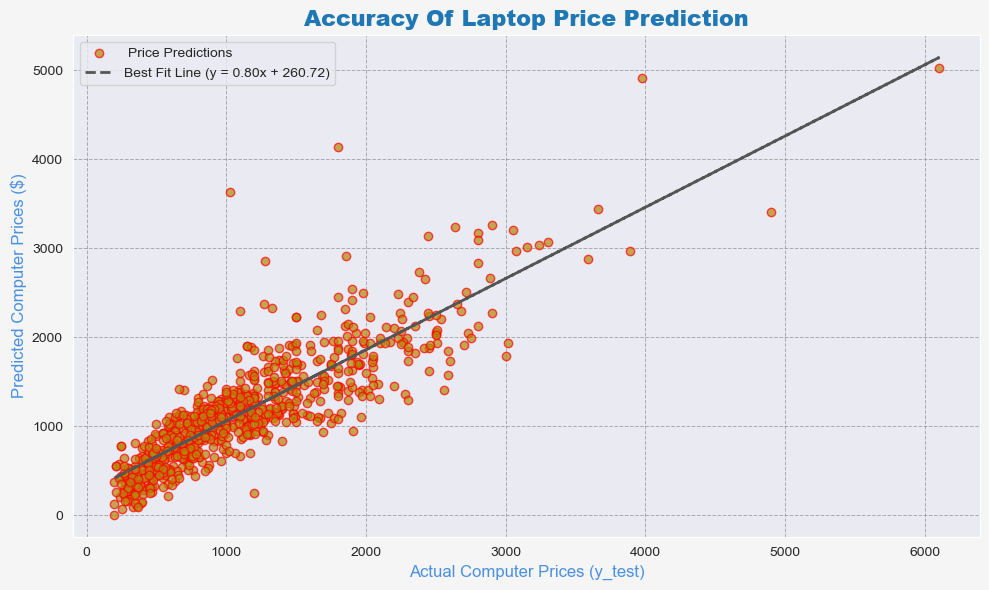

In [64]:
# Use the trained regression model to make predictions on the test data
predicted_laptop_prices = regression_model.predict(X_test)

# Create a figure with a light background and higher DPI for better quality
p.figure(figsize=(10, 6), facecolor="#f5f5f5", dpi=100)

# Scatter plot: actual vs predicted prices
p.scatter(
    y_test, predicted_laptop_prices,
    color="#b8860b", edgecolor="red", alpha=0.7,  
    label=" Price Predictions"
)

# Fit and plot a best-fit line
a, b = num.polyfit(y_test, predicted_laptop_prices, 1)
p.plot(
    y_test, a * y_test + b,
    color="#555555", linestyle="--", linewidth=2,  # Dark gray color
    label=f"Best Fit Line (y = {a:.2f}x + {b:.2f})"
)

# Add labels and title
p.xlabel("Actual Computer Prices (y_test)", fontsize=12, color='#4a90e2')  # Soft blue for x-axis label
p.ylabel("Predicted Computer Prices ($)", fontsize=12, color='#4a90e2')  # Soft blue for y-axis label
p.title("Accuracy Of Laptop Price Prediction", fontsize=16, fontweight='heavy', color='#1f78b4') # Dark blue for the title)

# Add a grid for better readability
p.grid(
    visible=True,          # Explicitly state that the grid should be visible
    which='both',           # Show gridlines
    linestyle='--',         # Dashed lines
    linewidth=0.7,          # Set gridlines for better visibility
    color='gray',           # set color
    alpha=0.6               # set transparency
)

# Add a legend
p.legend()

# Tight layout for better spacing
p.tight_layout()

# Display the final plot
p.show()

In [65]:
# This scatter plot illustrates that the closer the points are to the line, the more accurate the predictions are.
# From this, it is evident that the laptop price prediction model is performing very well. To delve deeper, let's examine the MAE and RMSE values.

In [66]:
# Import evaluation metrics from scikit-learn and the math module

from sklearn import metrics
import math

# Calculate and print the Mean Absolute Error (MAE)
# MAE measures the average magnitude of errors between predicted and actual prices
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, predicted_laptop_prices))

# Calculate and print the Root Mean Squared Error (RMSE)
# RMSE gives a higher penalty to larger errors and provides a more sensitive accuracy measure
print("Root Mean Squared Error (RMSE): ", math.sqrt(metrics.mean_squared_error(y_test, predicted_laptop_prices)))

Mean Absolute Error (MAE):  251.74939408064128
Root Mean Squared Error (RMSE):  350.213699507877


In [67]:
# The RMSE value measures the average error between predicted and actual values.
# Here, it suggests that laptop price predictions were off by approximately $350, which is a reasonable level of accuracy. 
# This observation aligns with the scatter plot, where most data points are situated near the regression line.

## Create the User Interface

In [68]:
# To interact with the laptop price prediction interface, simply execute the cell below. 
# Adjust the sliders and dropdown menus to specify the characteristics of the laptop you wish to evaluate. 
# Use the sliders to select values for memory (MB), CPU frequency (GHz), RAM (GB), screen size (inches), resolution (height & width), and weight (KG). 
# Choose the laptop's brand, CPU brand, operating system, GPU brand, and device type from the dropdown options. 
# After making all the selections, click the 'Predict Price' button to display the estimated laptop price below.

In [69]:
# --- Import Libraries ---
import pandas as pda
import ipywidgets as wgt
from IPython.display import display, clear_output, HTML
import time

# --- Inject Futuristic CSS Styling ---
display(HTML("""
<style>
    .futuristic-output {
        background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);
        color: #00ffcc;
        padding: 20px;
        border-radius: 15px;
        font-family: 'Courier New', monospace;
        font-size: 16px;
        border: 2px solid #00ffcc;
        box-shadow: 0 0 20px #00ffcc;
        animation: glow 2s infinite alternate;
    }
    @keyframes glow {
        from { box-shadow: 0 0 10px #00ffcc; }
        to { box-shadow: 0 0 30px #00ffcc; }
    }
    .custom-green-button > button {
        background: linear-gradient(45deg, #28a745, #218838);
        color: white;
        font-weight: bold;
        border-radius: 8px;
        border: none;
        font-size: 18px;
        padding: 10px 20px;
        transition: 0.4s;
    }
    .custom-green-button > button:hover {
        background: linear-gradient(45deg, #218838, #28a745);
        box-shadow: 0px 4px 15px rgba(40, 167, 69, 0.7);
        transform: scale(1.05);
    }
</style>
"""))

# --- widgets Setup ------

# Numeric sliders
memory_amt = wgt.IntSlider(min=1000, max=64000, step=1000, description="Memory (MB)")
frequency_of_cpu = wgt.FloatSlider(min=1.0, max=5.0, step=0.1, description="CPU (GHz)")
ram = wgt.IntSlider(min=2, max=64, step=2, description="RAM (GB)")
inches = wgt.FloatSlider(min=10.0, max=20.0, step=0.1, description="Screen Size")
computer_screen_height = wgt.IntSlider(min=600, max=4000, step=100, description="Height (px)")
computer_screen_width = wgt.IntSlider(min=800, max=8000, step=100, description="Width (px)")
weight = wgt.FloatSlider(min=0.5, max=5.0, step=0.1, description="Weight (kg)")

# Dropdowns
computer_brand = wgt.Dropdown(options=brand_of_computer, description="Brand")
brand_of_cpu = wgt.Dropdown(options=computer_cpu, description="CPU Brand")
computer_os = wgt.Dropdown(options=computer_OS, description="OS")
gpu_brand = wgt.Dropdown(options=computer_gpu, description="GPU Brand")
device_type = wgt.Dropdown(options=type_of_devices, description="Device Type")

# Predict Button (styled)
# Create Predict Button with dark green font color
predict_button = wgt.Button(
    description="Predict Price Now",
    style={'button_color': '#006400', 'font_weight': 'bold', 'font_color': '#90EE90'}
)
predict_button.add_class("custom-green-button")

# Output widget (styled)
output = wgt.Output()

# --- Define Prediction Function ---
def futuristic_predict(event):
    with output:
        clear_output()
        
        # Display futuristic loading animation
        display(HTML("""
            <h3 style="color: #00ffcc;">⏳ Processing your specs...</h3>
        """))
        time.sleep(1.5)  # Simulate some "thinking"
        
        # Prepare input
        input_features = {feature: 0 for feature in computer_components}
        input_features["Memory Amount"] = memory_amt.value
        input_features["CPU Frequency"] = frequency_of_cpu.value
        input_features["Ram"] = ram.value
        input_features["Inches"] = inches.value
        input_features["Screen Height"] = computer_screen_height.value
        input_features["Screen Width"] = computer_screen_width.value
        input_features["Weight"] = weight.value
        input_features[computer_brand.value] = 1
        input_features[brand_of_cpu.value] = 1
        input_features[computer_os.value] = 1
        input_features[gpu_brand.value] = 1
        input_features[device_type.value] = 1
        
        input_df = pda.DataFrame([input_features])[computer_components]
        predicted_price = regression_model.predict(input_df)[0]
        
        # Display result with animated futuristic box
    
        clear_output()
        display(HTML(f"""
            <div class="futuristic-output">
                <h2> ✅ Prediction Complete!</h2>
                <h3>💻 The Estimated Laptop Price is:</h3>
                <p style="font-size: 24px;">${predicted_price:,.2f}</p>
            </div>
        """))

# --- Bind Button ---
predict_button.on_click(futuristic_predict)

# --- Build the UI Layout ---
accordion_numeric = wgt.Accordion(children=[
    wgt.VBox([memory_amt, frequency_of_cpu, ram, inches, computer_screen_height, computer_screen_width, weight])
])
accordion_numeric.set_title(0, '⚙️ Technical Specs')

accordion_categorical = wgt.Accordion(children=[
    wgt.VBox([computer_brand, brand_of_cpu, computer_os, gpu_brand, device_type])
])
accordion_categorical.set_title(0, '🏷️ Brand/OS/Type')

# --- Final Display ---
display(
    HTML("<h1 style='color: #6a0dad; font-family: Courier New, monospace;'>⚡ Futuristic Laptop Price Predictor ⚡</h1>"),
    accordion_numeric,
    accordion_categorical,
    wgt.VBox([predict_button, output])
)

Accordion(children=(VBox(children=(IntSlider(value=1000, description='Memory (MB)', max=64000, min=1000, step=…

Accordion(children=(VBox(children=(Dropdown(description='Brand', options=('Asus', 'Xiaomi', 'Fujitsu', 'Huawei…